# Case Study : Classify Personal Income

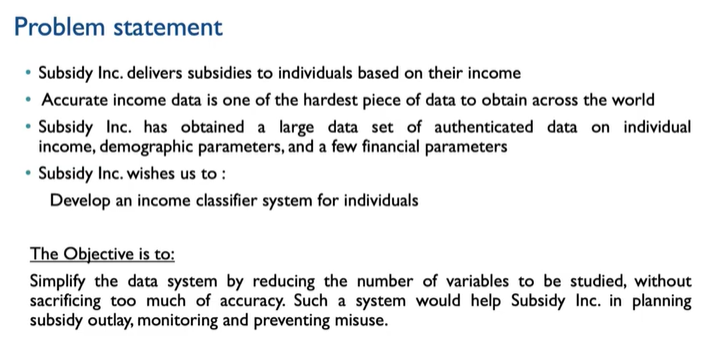

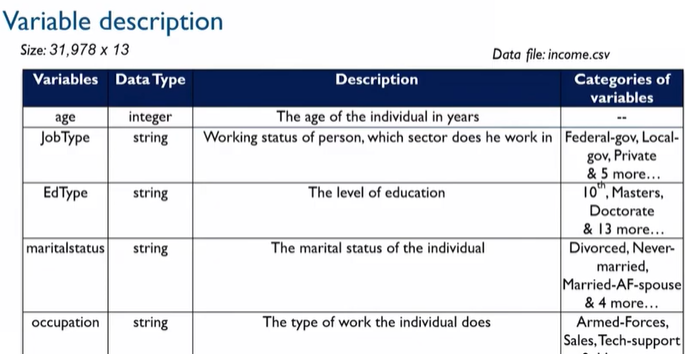

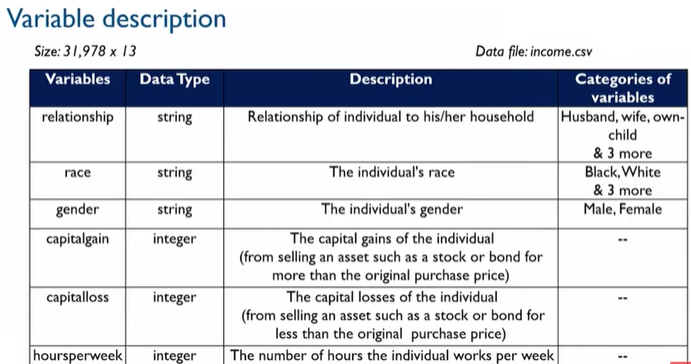

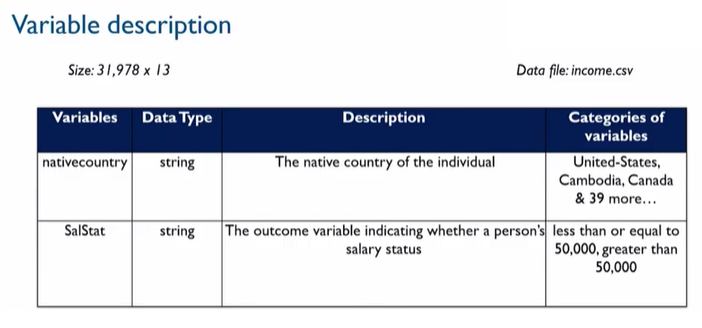

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

### To partition the data

In [3]:
from sklearn.model_selection import train_test_split

### Importing library for logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression

### Importing performance metrics- 
### Accuracy score and confusion matrix

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# os.listdir()

In [7]:
data_income = pd.read_csv('income.csv')

In [8]:
df = data_income.copy()

### check variable data types

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [10]:
df.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


### Find missing values

In [11]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

### Summary of numerical variable

In [12]:
sumnum = df.describe()

In [13]:
sumnum

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Summary of categorical variable

In [14]:
sumcate = df.describe(include='O')

In [15]:
sumcate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


### Frequency of each category

In [16]:
df['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [17]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

### checking for unique classes

In [18]:
np.unique(df['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [19]:
np.unique(df['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

### replaece ? with nan values

In [20]:
data = pd.read_csv('income.csv', na_values=[' ?'])

### Data Preprocessing

In [21]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [22]:
missing = data[data.isnull().any(axis=1)]

#### axis=1 --> to consider at least one col. value is missing

In [23]:
missing.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [24]:
missing.sort_values(['JobType'])

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
4825,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
10215,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
14073,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
19542,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,"less than or equal to 50,000"
22385,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


### Missing val in JobType      = 1809
### Missing val in Occupation = 1816
### 1816-1807 = 7  ==> Since jobtype is 'Never Worked', 
### occupation is unfilled of these 7 rows.

In [25]:
data2 = data.dropna(axis=0)

In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


### Relationship between independent variables

In [28]:
correlation = data2.corr()

In [29]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


## Cross tables and Data visualization

In [30]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

### gender proportion

In [31]:
gender = pd.crosstab(index = data2['gender'],
                    columns = 'count',
                     normalize=True
                    )

In [32]:
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


### gender vs. salary status

In [33]:
gender_salstat = pd.crosstab(index= data['gender'],
                            columns = data['SalStat'],
                             margins = True,
                             normalize = 'index'
                            )

In [34]:
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.109540                       0.890460
 Male                0.305709                       0.694291
All                  0.240634                       0.759366


### frequency distribution of salary status

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


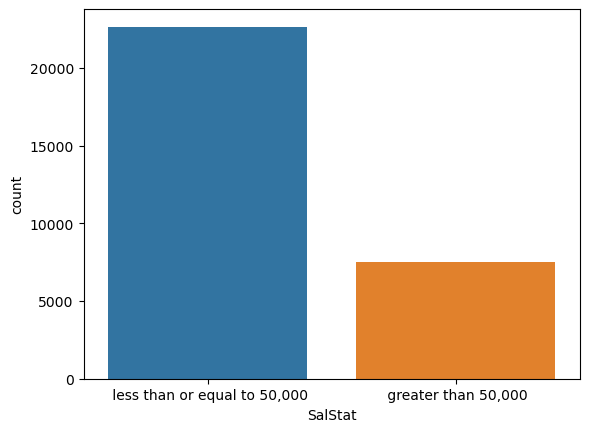

In [35]:
Salstat = sns.countplot(data2['SalStat'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

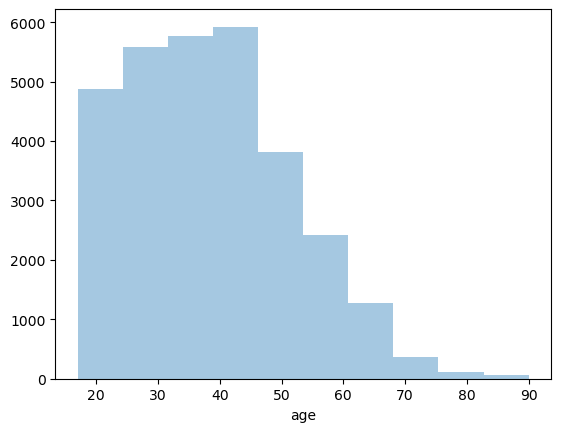

In [36]:
sns.distplot(data2['age'], bins=10, kde=False)

## Bivariate analysis for Age vs Salstat

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

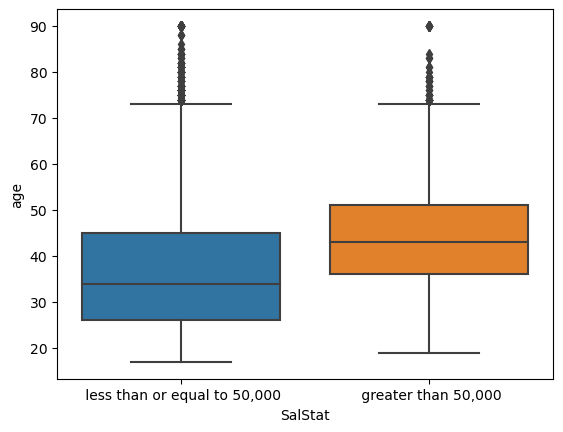

In [37]:
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()

##  Bivariate analysis for

In [38]:
# 1. jobtype vs. Salary status
# 2. Education vs. Salary status
# 3. Occupation vs. Salary status
# 4. Hoursper week vs . Salary status
# 5. Capital Gain


# Logistic Regression Model

### Reindex salstat names to 0,1

In [39]:
# print(data2['SalStat'])

data2['SalStat'] = data2['SalStat'].map(
        {
            ' less than or equal to 50,000':0,
            ' greater than 50,000':1
        }
)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12440\2575933477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map(


In [40]:
# data2['SalStat']

In [41]:
new_data = pd.get_dummies( data2, drop_first = True)

In [42]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## divide cols to dependent and indepenednt
# dependent = y
# indepent = x

### Storing col. names

In [43]:
columns_list = list(new_data.columns)

In [44]:
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

### Separating inout names from data (dependent valriables)

In [45]:
features = list( set(columns_list)- set(new_data['SalStat']))

In [46]:
print(features)

['maritalstatus_ Widowed', 'nativecountry_ Poland', 'nativecountry_ Cuba', 'nativecountry_ United-States', 'EdType_ 9th', 'nativecountry_ Greece', 'nativecountry_ Iran', 'EdType_ Some-college', 'relationship_ Not-in-family', 'EdType_ Doctorate', 'nativecountry_ Columbia', 'EdType_ Preschool', 'nativecountry_ Italy', 'nativecountry_ Vietnam', 'maritalstatus_ Married-civ-spouse', 'occupation_ Sales', 'nativecountry_ Nicaragua', 'occupation_ Handlers-cleaners', 'race_ Black', 'JobType_ Self-emp-not-inc', 'EdType_ 11th', 'EdType_ HS-grad', 'EdType_ Prof-school', 'EdType_ 1st-4th', 'nativecountry_ France', 'age', 'nativecountry_ Philippines', 'nativecountry_ Portugal', 'occupation_ Craft-repair', 'nativecountry_ Thailand', 'nativecountry_ Taiwan', 'nativecountry_ Scotland', 'nativecountry_ Canada', 'occupation_ Armed-Forces', 'nativecountry_ South', 'nativecountry_ India', 'EdType_ Bachelors', 'occupation_ Exec-managerial', 'nativecountry_ Dominican-Republic', 'race_ White', 'nativecountry_

### Storing output values in y (Independent)

In [47]:
y = new_data['SalStat'].values

In [48]:
print(y)

[0 0 1 ... 0 0 0]


### Storing the values from input features ( Dependent)

In [49]:
x = new_data[features].values

In [50]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


### Splitting the data into train test split

In [51]:
train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size = 0.3, random_state = 0
)

### Make an instance of the model

In [53]:
import statsmodels

import statsmodels.api as sm

train_x=sm.add_constant(train_x)

mod2=sm.OLS(train_y, train_x).fit()

In [54]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.680e+26
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:00:00   Log-Likelihood:             5.7899e+05
No. Observations:               21113   AIC:                        -1.158e+06
Df Residuals:                   21017   BIC:                        -1.157e+06
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.023e-13   9.48e-14     -8.467      0.0